## Introduction:

The data provided comes from images of handwritten digits, these handwritten digits have then been downloaded and converted into a 28 by 28 pixel grid with higher numbers representing the darkness of the pen. 

### Plan:

- 1). EDA: Check if the classes are balanced, Check to see if all columns are useful, Check for NaN or Null values, Plot a few random digits.
- 2). ML: Try a few models (svm, logistic regression, random forest), see if PCA or another type of feature selection method is useful.
- 3). Optimise selected algorithm. 

**Import libraries**

In [280]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1). EDA

**Importing the data and converting it into a DF**

In [281]:
df = pd.read_csv("C:/Users/UKGC/Python/Data/Supervised Learning Projects/Digit Classification/train.csv")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**No missing data. The df will be split now into train and test to avoid finding correlations in the test data to better simulate a deployed model**

In [283]:
X = df.drop(labels="label", axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [284]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
[X_train["pixel0"] > 0]

[40591    False
 154      False
 17372    False
 40346    False
 22004    False
          ...  
 34140    False
 13927    False
 919      False
 38467    False
 10742    False
 Name: pixel0, Length: 29400, dtype: bool]

**Very sparse matrix**

In [286]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,...,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.0,29400.0,29400.0,29400.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230884,0.136224,0.068231,0.024490,0.024626,0.004082,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.490728,5.155659,3.557983,1.966525,2.264329,0.495138,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


**Find the column with the highest mean value. This will show which pixels have the most data and are therefore most important.**

In [287]:
pixel_importance = X_train.describe().loc["mean"].sort_values(ascending=False)

**The below plot shows the mean value of the digits in a particular pixel. It can be seen that there are many pixels that dont have much information, these could be removed to improve model speed**

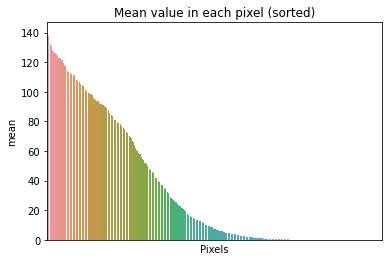

In [288]:
sns.barplot(x=pixel_importance.index, y=pixel_importance)
_=plt.title("Mean value in each pixel (sorted)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**The useful pixels seem to cluster together, as shown in the plot below**

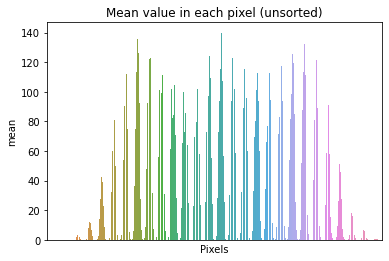

In [289]:
pixel_importance = X_train.describe().loc["mean"]
sns.barplot(x=pixel_importance.index, y=pixel_importance)
_=plt.title("Mean value in each pixel (unsorted)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**Create a function that removes all the pixels with mean values less than a specified threshold value. This is done on both training and test data.**

In [290]:
def remove_pixels(X_train, X_test, cutoff):
    # Create copies of the data:
    X_train_ = X_train.copy()
    X_test_ = X_test.copy()
    
    # Loop through the columns and drop any that have mean values < cutoff:
    for column in X_train_:
        if X_train_[column].mean() < cutoff:
            X_train_.drop(labels=column, axis=1, inplace=True)
            X_test_.drop(labels=column, axis=1, inplace=True)
            
    # Return a tuple of the train and test data
    return X_train_, X_test_

**Test with treshold = 30 (probably way too high)**

In [296]:
pixels_useful = test[0].describe().loc["mean"].sort_values(ascending=False)

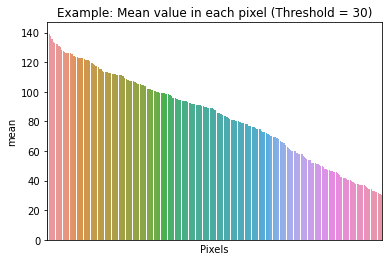

In [298]:
sns.barplot(x=pixels_useful.index, y=pixels_useful)
_=plt.title("Example: Mean value in each pixel (Threshold = 30)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**Check the class distribution for imbalance**

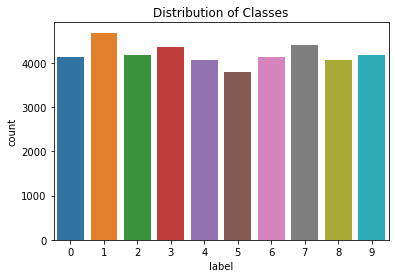

In [166]:
sns.countplot(df["label"])
_=plt.title("Distribution of Classes")

**Class distribution seems to be relatively uniform, no further action needed**

**Examine Random digit images**